<a href="https://colab.research.google.com/github/jasonhckim/Linear-Regression-Project/blob/main/Step_3_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
## Linear Regression Project

In [187]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [188]:
## Data Acquisition (displaying bike dataset)

bike = pd.read_csv('/content/SeoulBikeData.csv')

In [189]:
# Printing Dimension of datasets
print("Dimneion of the bike dataset", bike.shape)

Dimneion of the bike dataset (8760, 14)


In [190]:
# Showing overview of the bike dataset
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [191]:
# Extracting dataframe for only 'number' datatypes
df = bike.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [192]:
# Showing datatypes of the columns
df.info()

## a column list of factors that influence the number of bikes rented

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


In [193]:
# getting descriptive statistics on "number" datatypes
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [194]:
## Missing values
# Identifying missing values

miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

In [195]:
# Identifying missing values > 0 and sorting them by ascending order
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

In [196]:
# Showing overview of the train dataset after inputting missing values 
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [197]:
# Constructing correlation Matrix
df_bike = df[:8760]
data_corr = df_bike.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [198]:
# Considering only the features which have absolute correlation value greater than 0.0

data_corr = data_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.30].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Name: Rented Bike Count, dtype: float64

In [199]:
# df_test.drop(['Rented Bike Count'], axis = 1, inplace = True)
df_bike = df_bike[['Rented Bike Count','Temperature(C)','Hour','Dew point temperature(C)']]

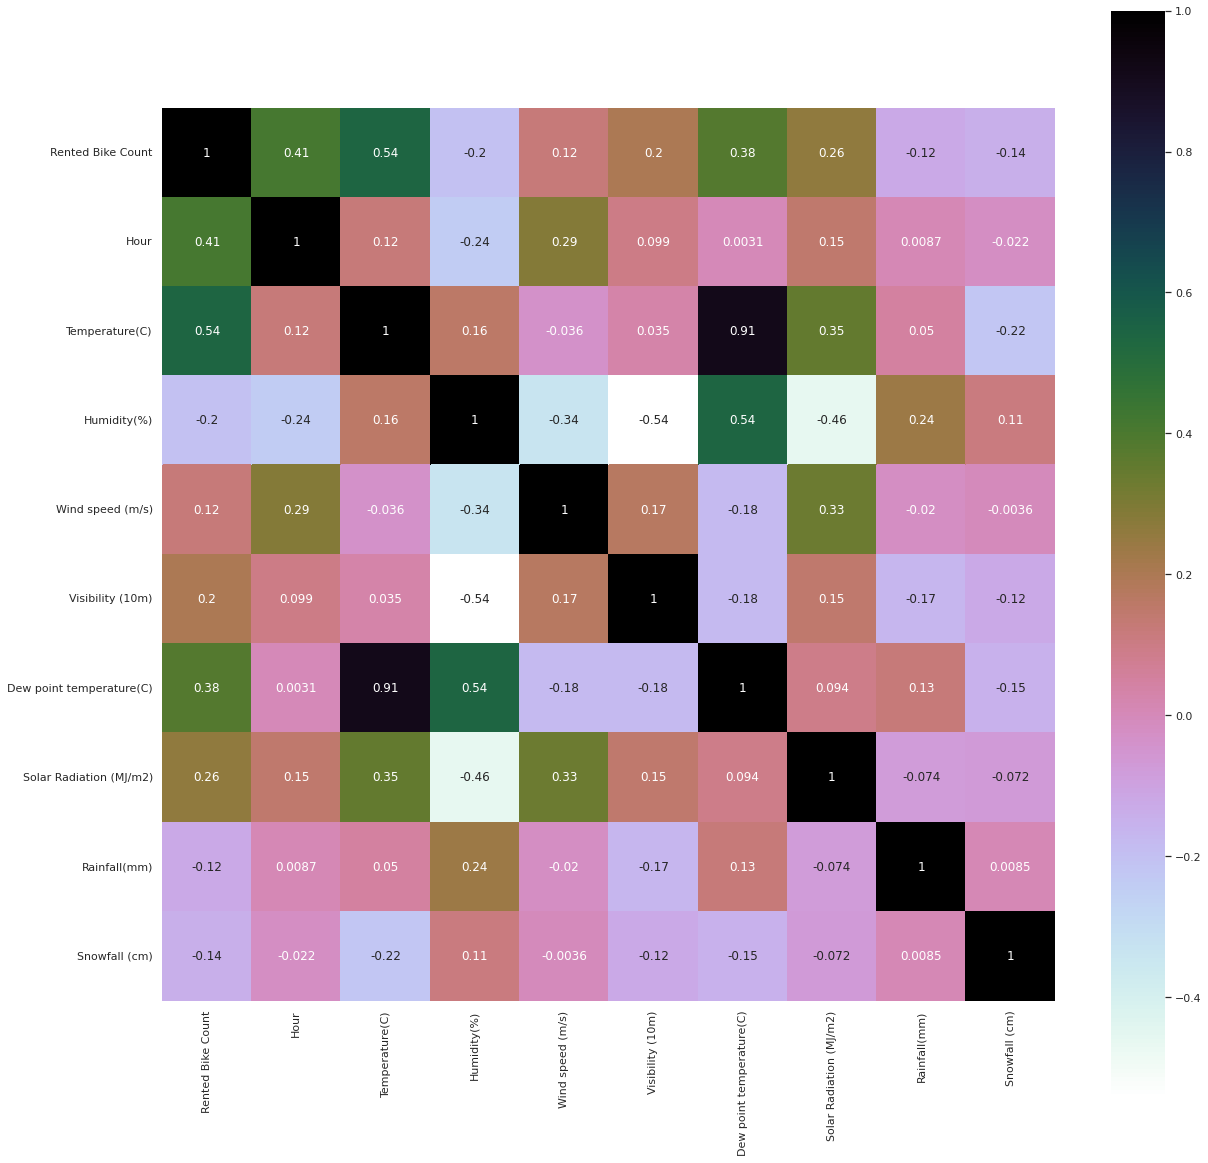

In [200]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f725218ba50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f725218da50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7252195a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7252195550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f725218bf90>,
  <matplotlib.lines.Line2D at 0x7f725218d510>]}

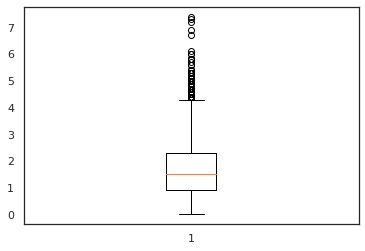

In [201]:
plt.boxplot(df['Wind speed (m/s)'])

In [202]:
Q1= np.percentile(df['Wind speed (m/s)'],25,interpolation='midpoint')
Q2= np.percentile(df['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q2-Q1
low_limit=Q1-1.5*IQR
up_limit=Q2+1.5*IQR


In [203]:
df2=df

In [204]:
df2=df2[df2['Wind speed (m/s)']<up_limit]
df2=df2[df2['Wind speed (m/s)']>low_limit]

{'boxes': [<matplotlib.lines.Line2D at 0x7f72520f8110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f72520fe110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7252106150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f72520febd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f72520f8650>,
  <matplotlib.lines.Line2D at 0x7f72520f8b90>]}

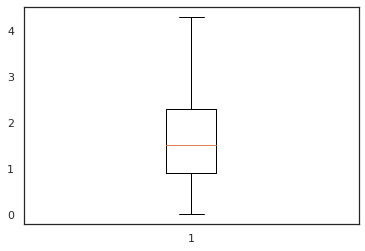

In [205]:
plt.boxplot(df2['Wind speed (m/s)'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f72520d9310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f725205f310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7252066350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f725205fdd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f72520d9850>,
  <matplotlib.lines.Line2D at 0x7f72520d9d90>]}

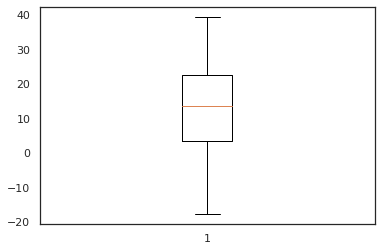

In [206]:
plt.boxplot(df['Temperature(C)'])

In [207]:
from sklearn.model_selection import train_test_split
bike, val = train_test_split(df_bike, test_size=0.25)

In [208]:
# considering only the highly correlated features
bike_x = bike.drop(['Rented Bike Count'], axis = 1)
bike_y = bike['Rented Bike Count'] # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [209]:
print('Dimension of bike_x dataframe:', bike_x.shape)
print('Dimension of bike_y dataframe:', bike_y.shape)
print('Dimension of val_x dataframe:', val_x.shape)
print('Dimension of val_y dataframe:', val_y.shape)

Dimension of bike_x dataframe: (6570, 3)
Dimension of bike_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 3)
Dimension of val_y dataframe: (2190,)


In [210]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(bike_x, bike_y)

LinearRegression()

In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:', mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared score of linear regression:', r2_score(val_y,df_pred))

Mean Absolute Error of linear regression: 350.63112123737307
Mean Square Error of linear regression: 223452.43032618865
R_Squared score of linear regression: 0.45465244518194825


In [215]:
df_pred

array([1254.14336076,  433.03672267,  234.606276  , ...,  646.90673642,
        340.27620586, 1296.19537332])